In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [65]:
import glmnet_python
from glmnet import glmnet

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso

### Load and prepare dataset

In [68]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [69]:
boston_df = pd.DataFrame(boston.data)
print(boston_df.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [70]:
boston_df.columns = boston.feature_names
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


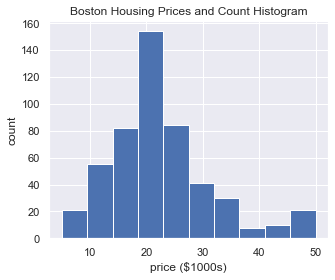

In [71]:
plt.figure(figsize=(5, 4))
plt.hist(boston.target)
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

In [72]:
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [74]:
#Converting CHAS and RAD to categorical type
boston_df['CHAS'] = boston_df['CHAS'].astype('int64').astype('category')
boston_df['RAD'] = boston_df['RAD'].astype('int64').astype('category')

In [75]:
boston_df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [76]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Splitting the data into training and test sets

In [77]:
df_train = boston_df.sample(frac = 0.7, replace = False, random_state = 13020975)
train_indices = list(df_train.index)
df_test = boston_df[~boston_df.index.isin(train_indices)] 

### Exploratory Data Analysis

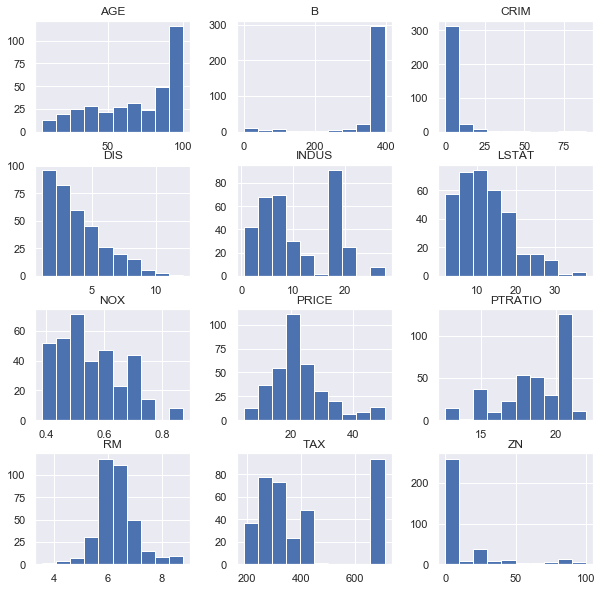

In [78]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
_ = df_train.hist(ax = ax)

Observations
- Age column has a 

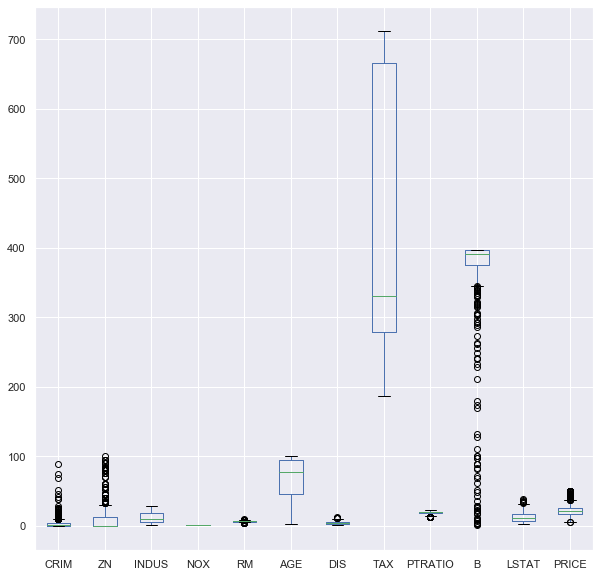

In [79]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
_ = boston_df.boxplot(ax=ax)

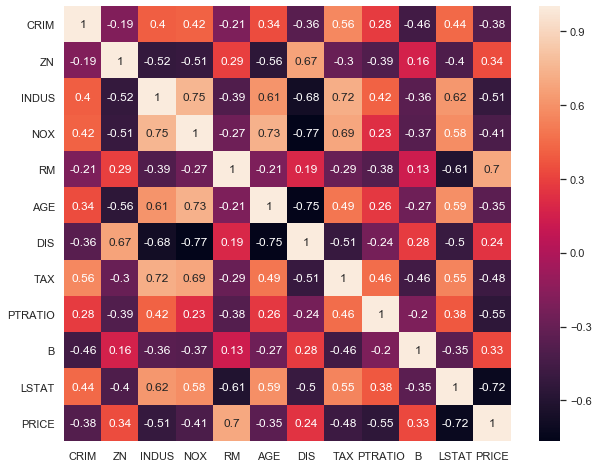

In [80]:
plt.figure(figsize = (10,8))
_ = sns.heatmap(df_train.corr(method="pearson"), annot = True)

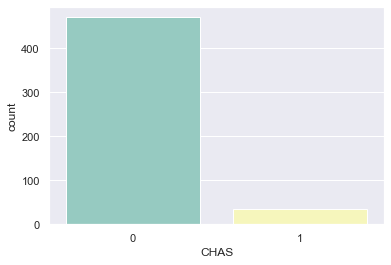

In [81]:
_ = sns.countplot(x=boston_df['CHAS'], palette='Set3')

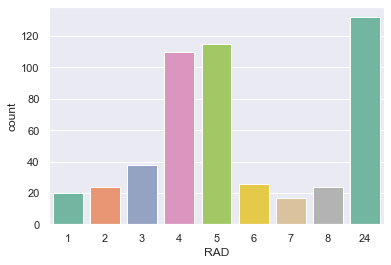

In [82]:
_ = sns.countplot(x=boston_df['RAD'], palette='Set2')

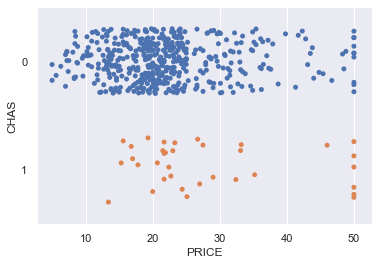

In [83]:
_ = sns.stripplot(x="PRICE", y="CHAS", data=boston_df, jitter=0.3)

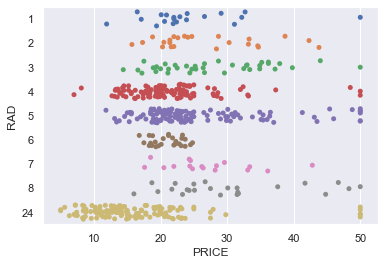

In [84]:
_ = sns.stripplot(x="PRICE", y="RAD", data=boston_df, jitter=0.3)

### Model building and evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [85]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(boston_df, train_size=0.7, test_size=0.3, random_state=100)

In [86]:
# Split the train dataset into X and y
y_train = df_train.pop('PRICE')
X_train = df_train

In [87]:
# Split the test dataset into X and y
y_test = df_test.pop('PRICE')
X_test = df_test

#### Building the first model with all the features

Let's now build our first model with all the features.

In [88]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-7.69175693e-02  3.95527497e-02 -6.09889801e-03  2.63034959e+00
 -1.31416178e+01  3.84418005e+00 -1.20624925e-02 -1.37626293e+00
  2.83925319e-01 -1.40640197e-02 -9.18566330e-01  1.05783116e-02
 -4.37960459e-01]
33.11584094298599


#### Model Building Using RFE

Now, we have 13 features. Although, it is possible to manually eliminate these features, however, let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (9 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [90]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 9 features
lm = LinearRegression()
rfe1 = RFE(lm, 9)

# Fit with 9 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[ True  True False  True  True  True False  True  True False  True False
  True]
[1 1 5 1 1 1 3 1 1 2 1 4 1]


##### Model Evaluation 

Let's now check the summary of this model using `statsmodels`.

In [91]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 9 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,PTRATIO,LSTAT
463,1.0,5.82115,0.0,0,0.713,6.513,2.8016,24,20.2,10.29
75,1.0,0.09512,0.0,0,0.437,6.286,4.5026,5,18.7,8.94
478,1.0,10.23300,0.0,0,0.614,6.185,2.1705,24,20.2,18.03
199,1.0,0.03150,95.0,0,0.403,6.975,7.6534,3,17.0,4.56
84,1.0,0.05059,0.0,0,0.449,6.389,4.7794,3,18.5,9.62


In [92]:
# Fitting the model with 9 variables
lm1 = sm.OLS(y_train, X_train_rfe1.astype('float')).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     105.0
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           4.37e-93
Time:                        14:08:19   Log-Likelihood:                -1037.7
No. Observations:                 354   AIC:                             2095.
Df Residuals:                     344   BIC:                             2134.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.8917      5.493      6.898      0.0

The model seems to be doing a good job. However, let's check the VIF values.

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.astype('float').values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,503.99
4,NOX,3.51
6,DIS,3.18
7,RAD,2.83
9,LSTAT,2.59
2,ZN,2.02
1,CRIM,1.94
5,RM,1.81
8,PTRATIO,1.64
3,CHAS,1.03


The intercept term has a very high VIF value. However, we can safely ignore it. Let's try and build a model with 7 variables and see what we get

In [95]:
# RFE with 7 features
from sklearn.feature_selection import RFE

# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(lm, 7)

# Fit with 7 features
rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=7, step=1, verbose=0)

In [96]:
# Subset the features selected by rfe2
col2 = X_train.columns[rfe2.support_]

# Subsetting training data for 10 selected columns
X_train_rfe2 = X_train[col2]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe2.astype('float')).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     132.4
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           7.81e-94
Time:                        14:08:19   Log-Likelihood:                -1041.0
No. Observations:                 354   AIC:                             2098.
Df Residuals:                     346   BIC:                             2129.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6104      5.040      7.065      0.0

Note that the adjusted R-squared value hasn't dropped much practically. It has gone from `0.726` to `0.723`

Let's calculate the Mean-Squared Prediction Error for the above model

In [97]:
from statsmodels.tools.eval_measures import mse
#Make predictions
X_test_lm2 = X_test[col2]
y_pred_lm2 = lm2.predict(sm.add_constant(X_test_lm2))
mse_test_lm2 = mse(y_test, y_pred_lm2)
mse_test_lm2

31.02189740281182

#### Model building using LASSO regression

##### Building the LASSO regression model

In [98]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0).fit(X_train, y_train)

In [99]:
print(reg.coef_)
print('Optimal alpha value is:', reg.alpha_)

[-0.04590661  0.04519197 -0.          0.         -0.          1.86154322
  0.00439967 -0.7613526   0.27646865 -0.01801281 -0.71157806  0.00949334
 -0.61256152]
Optimal alpha value is: 0.71999412684733


In [100]:
from sklearn.metrics import mean_squared_error
y_test_pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean-squared prediction error for Lasso Regression model is:', mse_test)

Mean-squared prediction error for Lasso Regression model is: 34.469153670037365


**The MSE on testing data is a little higher for the LASSO regression model, as compared to the non-regularized linear regression model**

#### Model building using Regression Tree

Next, we will use a Regression Tree to predict median house prices. We'll use `Grid Search` for finding the optimal value of the maximum depth of the decision tree. 

##### Define a function to calculate the mean square error
We'll use the function defined below to evaluate the models built during hyperparameter tuning

In [101]:
def model_perf_metric(y_true, y_predict):
    """ Calculates and returns the mean squared error. """
    mse = mean_squared_error(y_true, y_predict)
    return mse

##### Fit a decision tree and calculate mean-squared prediction error - Without passing any parameters explicitly to the decision tree regressor

In [102]:
# Fit regression model and obtain predictions on test
from sklearn.tree import DecisionTreeRegressor
model =  DecisionTreeRegressor()
model.fit(X_train, y_train)
model_test_pred = model.predict(X_test)

In [103]:
#Get MSPE
model_perf_metric(y_test, model_test_pred)

27.65032894736842

In [104]:
model.n_features_

13

Let's calculate R-squared for our decision tree regressor

In [105]:
from sklearn.metrics import r2_score
r2_score(y_test, model_test_pred)

0.7270045694701197

##### Fitting a decision tree with different max-depth parameters - 5 and 9

In [106]:
# Fit regression model and obtain predictions on test using max_depth = 5
model2 =  DecisionTreeRegressor(max_depth=5)
model2.fit(X_train, y_train)
model2_test_pred = model2.predict(X_test)

In [107]:
#Get MSPE
model_perf_metric(y_test, model2_test_pred)

31.62995859019536

In [108]:
r2_score(y_test, model2_test_pred)

0.6877131487510033

In [109]:
# Fit regression model and obtain predictions on test using max_depth = 9
model3 =  DecisionTreeRegressor(max_depth=9)
model3.fit(X_train, y_train)
model3_test_pred = model3.predict(X_test)

In [110]:
#Get MSPE
model_perf_metric(y_test, model3_test_pred)

27.538263799601204

In [111]:
r2_score(y_test, model3_test_pred)

0.7281110038029748

We can see that both the above models under-perform, as compared to the first decision model tree we built

### Results and model selection

Below is a summary of the results we have obtained using different modeling techniques

| S.No. | Modeling Technique                          | Mean-squared prediction error | Number of predictors |
|-------|---------------------------------------------|-------------------------------|----------------------|
| 1     | Ordinary Least Squares Regression using RFE | 31.02                         | 7                    |
| 2     | LASSO Regression                            | 34.46                         | 10                   |
| 3     | Regression Tree                             | 25.47                         | 13                   |

#### Observations
- We can see that LASSO regression performs poorly as compared to OLS regression and Regression Tree
- Although Regression Tree is able to achieve a lower MSPE as compared to OLS regression, it is utilizing more predictors than the OLS model

**Since the difference between the MSPE values is not a lot (~7 units), we would want to select a parsimonious model, i.e. a model that achieves a desired level of prediction with as few predictors as possible. Therefore, we will go ahead with the model developed using RFE technique**